<a href="https://colab.research.google.com/github/hargurjeet/Lending-Club-CaseStudy/blob/main/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
! git clone https://github.com/hargurjeet/Lending-Club-CaseStudy.git

Cloning into 'Lending-Club-CaseStudy'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [ ]:
with zipfile.ZipFile("/content/Lending-Club-CaseStudy/loan.zip","r") as zip_ref:
    zip_ref.extractall("/content/Lending-Club-CaseStudy/")

# Data Understanding

All data quality issues are correctly identified and reported. 

 

Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.

In [ ]:
file_path = r'/content/Lending-Club-CaseStudy/loan.csv'
df = pd.read_csv(file_path)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
df1 = pd.read_excel('/content/Lending-Club-CaseStudy/Data_Dictionary.xlsx')
df1

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [ ]:
df.shape

(39717, 111)

In [ ]:
def view_all(df):
  pd.set_option('display.max_rows', None)
  pd.set_option('max_columns', None)
  pd.set_option('display.max_colwidth', None)
  return df.style.set_properties(**{'text-align': 'left'})

view_all(df1)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Data Cleaning and Manipulation

Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 

 

If applicable, data is converted to a suitable and convenient format to work with using the right methods.

 

 

Manipulation of strings and dates is done correctly wherever required.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Identifying missing values

In [ ]:
# Checking the missing values
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [ ]:
# Funtion to remove the columns where 90% of values are missing
def columns_with_high_missing_values_removed(df):
  missing_percent = (df.isnull().sum()/len(df))*100
  for feature, values in zip(missing_percent.index, missing_percent):
    if values >= 90:
      missing_percent.drop(feature, inplace=True)
  return missing_percent

df2 = columns_with_high_missing_values_removed(df)
df2

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [ ]:
df2.shape

(55,)

In [ ]:
print(df2.loc[lambda x:(x<70) & (x>10)])

desc                      32.580507
mths_since_last_delinq    64.662487
dtype: float64


In [ ]:
## There is pratically no logical ways to fill these missing values
## droping these features for now
df3 = df2.drop(['desc', 'mths_since_last_delinq'])
df3.shape


(53,)

In [ ]:
# Filtering columns with low missing values
low_missing_values_col = df3.loc[lambda x:(x<10) & (x>0)].sort_values(ascending=False).index
low_missing_values_col

Index(['emp_title', 'emp_length', 'pub_rec_bankruptcies', 'last_pymnt_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'revol_util',
       'tax_liens', 'title', 'last_credit_pull_d'],
      dtype='object')

In [ ]:
df[low_missing_values_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   emp_title                   37258 non-null  object 
 1   emp_length                  38642 non-null  object 
 2   pub_rec_bankruptcies        39020 non-null  float64
 3   last_pymnt_d                39646 non-null  object 
 4   collections_12_mths_ex_med  39661 non-null  float64
 5   chargeoff_within_12_mths    39661 non-null  float64
 6   revol_util                  39667 non-null  object 
 7   tax_liens                   39678 non-null  float64
 8   title                       39706 non-null  object 
 9   last_credit_pull_d          39715 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.0+ MB


In [ ]:
df[low_missing_values_col].head()

,emp_title,emp_length,pub_rec_bankruptcies,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,revol_util,tax_liens,title,last_credit_pull_d
0,NaN,10+ years,0.0,Jan-15,0.0,0.0,83.70%,0.0,Computer,May-16
1,Ryder,< 1 year,0.0,Apr-13,0.0,0.0,9.40%,0.0,bike,Sep-13
2,NaN,10+ years,0.0,Jun-14,0.0,0.0,98.50%,0.0,real estate business,May-16
3,AIR RESOURCES BOARD,10+ years,0.0,Jan-15,0.0,0.0,21%,0.0,personel,Apr-16
4,University Medical Group,1 year,0.0,May-16,0.0,0.0,53.90%,0.0,Personal,May-16


In [ ]:
## As the missing values of low and there is no logical ways of imputting them all
## Hence I am dropping the rows containing missing values
# df4 = df3.drop(low_missing_values_col)
df4 = df[df3.index].dropna()
df4.shape

(36431, 53)

In [ ]:
pd.reset_option('all')
pd.set_option('max_columns', None)
df4.head(2)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.0,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.0,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Data Standardization

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36431 non-null  int64  
 1   member_id                   36431 non-null  int64  
 2   loan_amnt                   36431 non-null  int64  
 3   funded_amnt                 36431 non-null  int64  
 4   funded_amnt_inv             36431 non-null  float64
 5   term                        36431 non-null  object 
 6   int_rate                    36431 non-null  object 
 7   installment                 36431 non-null  float64
 8   grade                       36431 non-null  object 
 9   sub_grade                   36431 non-null  object 
 10  emp_title                   36431 non-null  object 
 11  emp_length                  36431 non-null  object 
 12  home_ownership              36431 non-null  object 
 13  annual_inc                  364

Following columns can be fixed to analyse them better
- Term, emp_length, Interest rate, revol_util  - Can be converted to numberic values
- issue_d, earliest_cr_line, last_pymnt_d,last_credit_pull_d - Can be segegated to year and month for better analysis

In [ ]:
## Fixing the numberic columns
df4.term = df4.term.apply(lambda x: x.strip(' months')).astype('int64')
df4.emp_length = df4.emp_length.apply(lambda x: x.strip(' years < year +')).astype('int64')
df4.int_rate = df4.int_rate.apply(lambda x: x.strip(' %')).astype('float')
df4.revol_util = df4.revol_util.apply(lambda x: x.strip(' %')).astype('float')

In [ ]:
df4[['Issue_Month', 'Issue_Year']] =df4.issue_d.str.split("-", expand = True)
df4[['Issue_Year']] = df4[['Issue_Year']].astype('int64')

df4[['earliest_cr_line_Month', 'earliest_cr_line_Year']] =df4.earliest_cr_line.str.split("-", expand = True)
df4[['earliest_cr_line_Year']] = df4[['earliest_cr_line_Year']].astype('int64')

df4[['last_pymnt_Month', 'last_pymnt_Year']] =df4.last_pymnt_d.str.split("-", expand = True)
df4[['last_pymnt_Year']] = df4[['Issue_Year']].astype('int64')

df4[['last_credit_pull_Month', 'last_credit_pull_Year']] =df4.last_credit_pull_d.str.split("-", expand = True)
df4[['last_credit_pull_Year']] = df4[['last_credit_pull_Year']].astype('int64')

In [ ]:
df4[['Issue_Month', 'Issue_Year', 'earliest_cr_line_Month', 'earliest_cr_line_Year',
     'last_pymnt_Month', 'last_pymnt_Year','last_credit_pull_Month', 'last_credit_pull_Year',
     'term', 'emp_length', 'int_rate', 'revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Issue_Month             36431 non-null  object 
 1   Issue_Year              36431 non-null  int64  
 2   earliest_cr_line_Month  36431 non-null  object 
 3   earliest_cr_line_Year   36431 non-null  int64  
 4   last_pymnt_Month        36431 non-null  object 
 5   last_pymnt_Year         36431 non-null  int64  
 6   last_credit_pull_Month  36431 non-null  object 
 7   last_credit_pull_Year   36431 non-null  int64  
 8   term                    36431 non-null  int64  
 9   emp_length              36431 non-null  int64  
 10  int_rate                36431 non-null  float64
 11  revol_util              36431 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 3.6+ MB


## Outlier Treatment

In [ ]:
df4.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Issue_Month,Issue_Year,earliest_cr_line_Month,earliest_cr_line_Year,last_pymnt_Month,last_pymnt_Year,last_credit_pull_Month,last_credit_pull_Year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Apr,99,Apr,11,Sep,13
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Feb,96,Jan,11,Apr,16
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Jan,96,May,11,May,16
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Nov,4,Jan,11,Jan,16
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,f,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Jul,5,May,11,May,16


In [ ]:
df4.loan_amnt.describe()

count    36431.000000
mean     11307.794186
std       7433.904309
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

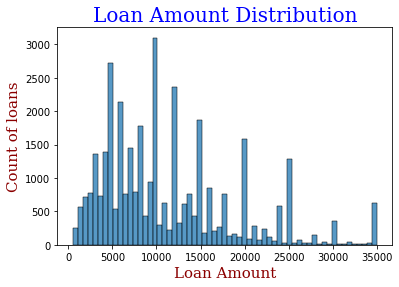

In [ ]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

sns.histplot(df4.loan_amnt)
plt.title('Loan Amount Distribution',  fontdict = font1)
plt.xlabel("Loan Amount", fontdict = font2)
plt.ylabel("Count of loans", fontdict = font2)
plt.show()

In [ ]:
## Removing the extreme values of loan amount.
## Keeping loan amount upto 25K
# df4.shape
df5 = df4[df4.loan_amnt <= 25000]

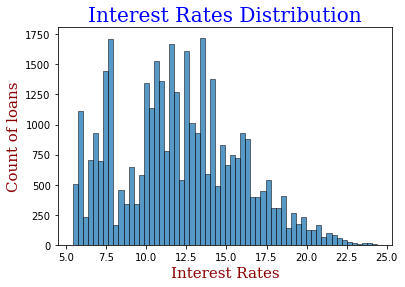

In [ ]:
sns.histplot(df4.int_rate)
plt.title('Interest Rates Distribution',  fontdict = font1)
plt.xlabel("Interest Rates", fontdict = font2)
plt.ylabel("Count of loans", fontdict = font2)
plt.show()

In [ ]:
## Exlcuinding loans with extremen high interest rates
df6 = df5[df5.int_rate <= 20]

In [ ]:
df6.shape

(34357, 61)

## Removing redandant columns
1. id
2. member id
3. applicaton type
4. current loans status
5. investor amount should be less than or equal to loan amount
6. pymnt_plan

# Data analysis (40%)

The right problem is solved which is coherent with the needs of the business. The analysis has a clear structure and the flow is easy to understand.

 

 

Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

 

Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis. The explanation for creating the derived metrics is mentioned and is reasonable.

 

Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables. The combinations of variables are chosen such that they make business or analytical sense. 

 

The most useful insights are explained correctly in the comments.

 
 

Appropriate plots are created to present the results of the analysis. The choice of plots for respective cases is correct. The plots should clearly present the relevant insights and should be easy to read. The axes and important data points are labelled correctly.

## Univariate Analysis - Categroical variables
Types of variable

cateforical variables

*   ordered
*   unordered


 
 

numberic variables

In [ ]:
numberic_features = df6.select_dtypes(include='number').columns
numberic_features

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'Issue_Year',
       'earliest_cr_line_Year', 'last_pymnt_Year', 'last_credit_pull_Year'],
      dtype='object')

In [ ]:
categorical_features = df6.select_dtypes(include='object').columns
categorical_features

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'Issue_Month', 'earliest_cr_line_Month',
       'last_pymnt_Month', 'last_credit_pull_Month'],
      dtype='object')

In [ ]:
df6.select_dtypes(include='object').head()

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,Issue_Month,earliest_cr_line_Month,last_pymnt_Month,last_credit_pull_Month
1,C,C4,Ryder,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL,Dec,Apr,Apr,Sep
3,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,Feb-96,f,Jan-15,Apr-16,INDIVIDUAL,Dec,Feb,Jan,Apr
4,B,B5,University Medical Group,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,Jan-96,f,May-16,May-16,INDIVIDUAL,Dec,Jan,May,May
5,A,A4,Veolia Transportaton,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,f,Jan-15,Jan-16,INDIVIDUAL,Dec,Nov,Jan,Jan
6,C,C5,Southern Star Photography,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,Jul-05,f,May-16,May-16,INDIVIDUAL,Dec,Jul,May,May


In [ ]:
df6.loan_status.value_counts(normalize=True)

Fully Paid     0.845854
Charged Off    0.129493
Current        0.024653
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Loan Status')

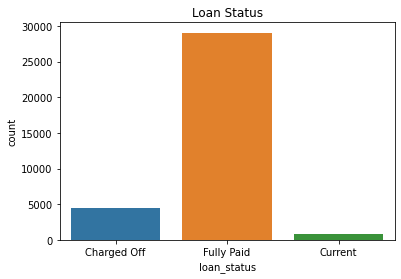

In [ ]:
sns.countplot(x=df6.loan_status)
plt.title('Loan Status')

Only 12% of overall popuation seems to have defaulted

In [ ]:
df6.grade.value_counts()

B    10695
A     9064
C     7198
D     4672
E     2234
F      471
G       23
Name: grade, dtype: int64

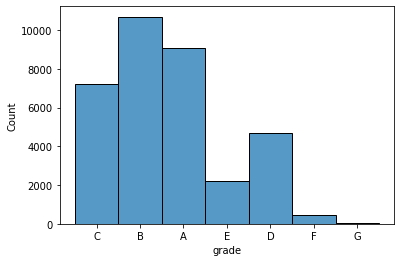

In [ ]:
sns.histplot(df6.grade)
plt.show()

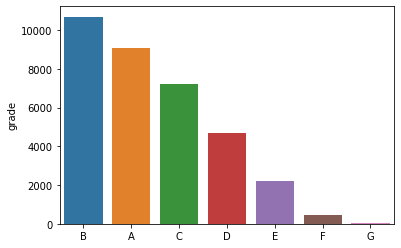

In [ ]:
sns.barplot(data=df6, x=df6.grade.value_counts().index, y=df6.grade.value_counts());

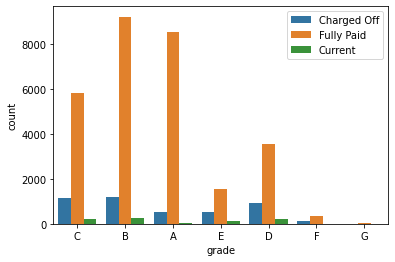

In [ ]:
sns.countplot(x=df6.grade, hue=df6.loan_status)
plt.legend(loc='upper right')
plt.show()

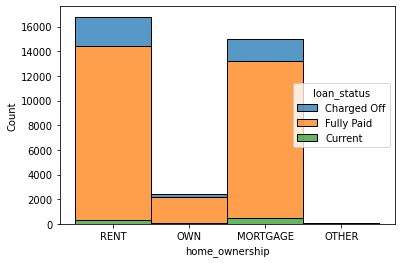

In [ ]:
sns.histplot(x=df6.home_ownership, hue=df6.loan_status, multiple="stack")

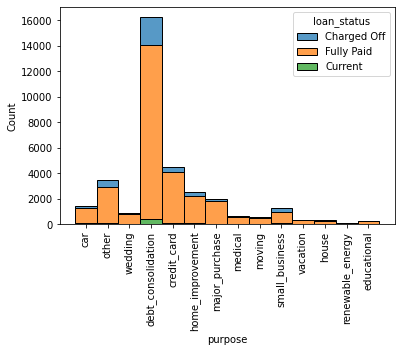

In [ ]:
sns.histplot(x=df6.purpose, hue=df6.loan_status, multiple="stack")
plt.xticks(rotation=90)
plt.show()

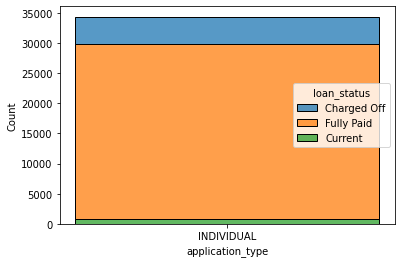

In [ ]:
sns.histplot(x=df6.application_type, hue=df6.loan_status, multiple="stack")

## Univariate Analysis - Quantitative variables

In [ ]:
 df6.select_dtypes(include='number').head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Issue_Year,earliest_cr_line_Year,last_pymnt_Year,last_credit_pull_Year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,1,30000.0,1.00,0,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0,11,99,11,13
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,10,49200.0,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0,11,96,11,16
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,1,80000.0,17.94,0,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0,11,96,11,16
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,3,36000.0,11.20,0,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,1,0,0.0,0,0.0,0.0,11,4,11,16
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,8,47004.0,23.51,0,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,1,0,0.0,0,0.0,0.0,11,5,11,16


In [ ]:
df6.loan_amnt.describe()

count    34357.000000
mean     10338.439037
std       6170.139002
min        500.000000
25%       5200.000000
50%       9500.000000
75%      14500.000000
max      25000.000000
Name: loan_amnt, dtype: float64

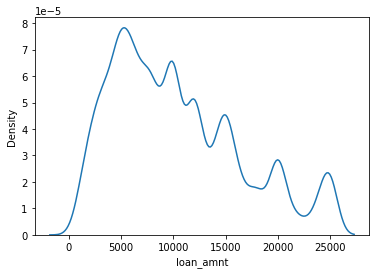

In [ ]:
sns.kdeplot(data=df6, x="loan_amnt")

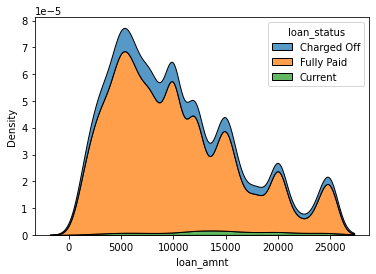

In [ ]:
sns.kdeplot(data=df6, x="loan_amnt", hue='loan_status', multiple="stack")

In [ ]:
df6.Issue_Year.value_counts()

11    18168
10    10717
9      4415
8      1053
7         4
Name: Issue_Year, dtype: int64

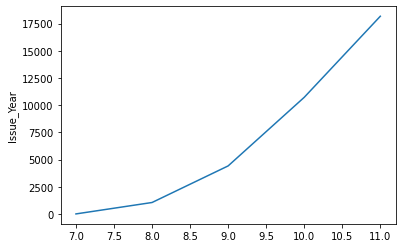

In [ ]:
sns.lineplot(x=df6.Issue_Year.value_counts().index , y=df6.Issue_Year.value_counts())
plt.show()

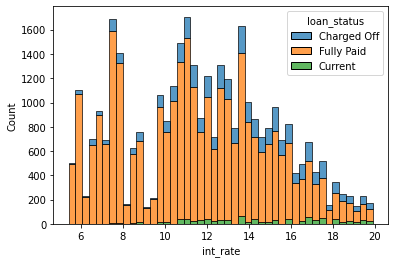

In [ ]:
sns.histplot(x=df6.int_rate, hue=df6.loan_status, multiple="stack")
plt.show()

In [ ]:
df6[df6.annual_inc<=2000000].annual_inc

1         30000.00
3         49200.00
4         80000.00
5         36000.00
6         47004.00
           ...    
39433     96000.00
39475    100671.39
39551     80000.00
39562     35000.00
39623     39000.00
Name: annual_inc, Length: 34355, dtype: float64

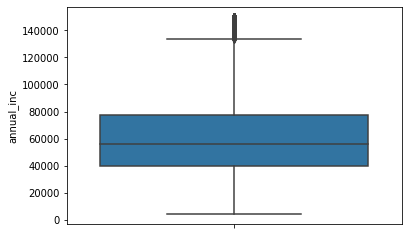

In [ ]:
sns.boxplot(y=df6[df6.annual_inc<=150000].annual_inc)

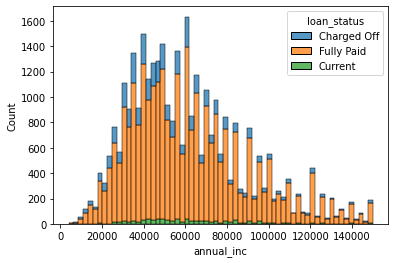

In [ ]:
sns.histplot(x=df6[df6.annual_inc<=150000].annual_inc, hue=df6.loan_status, multiple="stack")

## Improtant factor for default 
1. interest rate
2. loan amount
3. grade
4. annual income
5. home_ownership
6. purpose

14 % or around 6K loan applicants has defaulted on the loans. Let us filter out these applicants in our analysis

In [ ]:
charged_off_applicants = df4[df4.loan_status=='Charged Off']
charged_off_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Issue_Month,Issue_Year,earliest_cr_line_Month,earliest_cr_line_Year,last_pymnt_Month,last_pymnt_Year,last_credit_pull_Month,last_credit_pull_Year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Apr,99,Apr,11,Sep,13
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,1,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Sep,4,Nov,11,Mar,13
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.7,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Apr,4,Jul,11,Nov,12
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,SFMTA,3,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.5,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,May,91,Oct,11,Mar,14
21,1039153,1269083,21000,21000,21000.0,36,12.42,701.73,B,B4,Osram Sylvania,10,RENT,105000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Cleanup,335xx,FL,13.22,0,Feb-83,0,7,0,32135,90.3,38,f,0.0,0.0,14025.40,14025.40,10694.96,3330.44,0.0,0.00,0.0000,Sep-13,701.73,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Dec,11,Feb,83,Sep,11,May,16


In [ ]:
charged_off_applicants.purpose.value_counts()/len(charged_off_applicants)

debt_consolidation    0.507487
other                 0.110482
credit_card           0.096924
small_business        0.072036
home_improvement      0.059895
major_purchase        0.038446
car                   0.030150
medical               0.019223
wedding               0.016795
moving                0.015985
house                 0.010522
vacation              0.009915
educational           0.009106
renewable_energy      0.003035
Name: purpose, dtype: float64

In [ ]:
df4[~(df4.loan_status=='Charged Off')].purpose.value_counts()/34090

debt_consolidation    0.438838
credit_card           0.124582
other                 0.088853
home_improvement      0.070666
major_purchase        0.053329
car                   0.037958
small_business        0.031035
wedding               0.023555
medical               0.015811
moving                0.013200
house                 0.008536
vacation              0.008419
educational           0.006776
renewable_energy      0.002141
Name: purpose, dtype: float64

Around 40% of these loan applicants were not verfied

In [ ]:
df4.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'Issue_Month', 'Issue_Year',
       'earliest_cr_line_Month', 'earliest_cr_line_Ye

In [ ]:
relevant_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan','zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt']

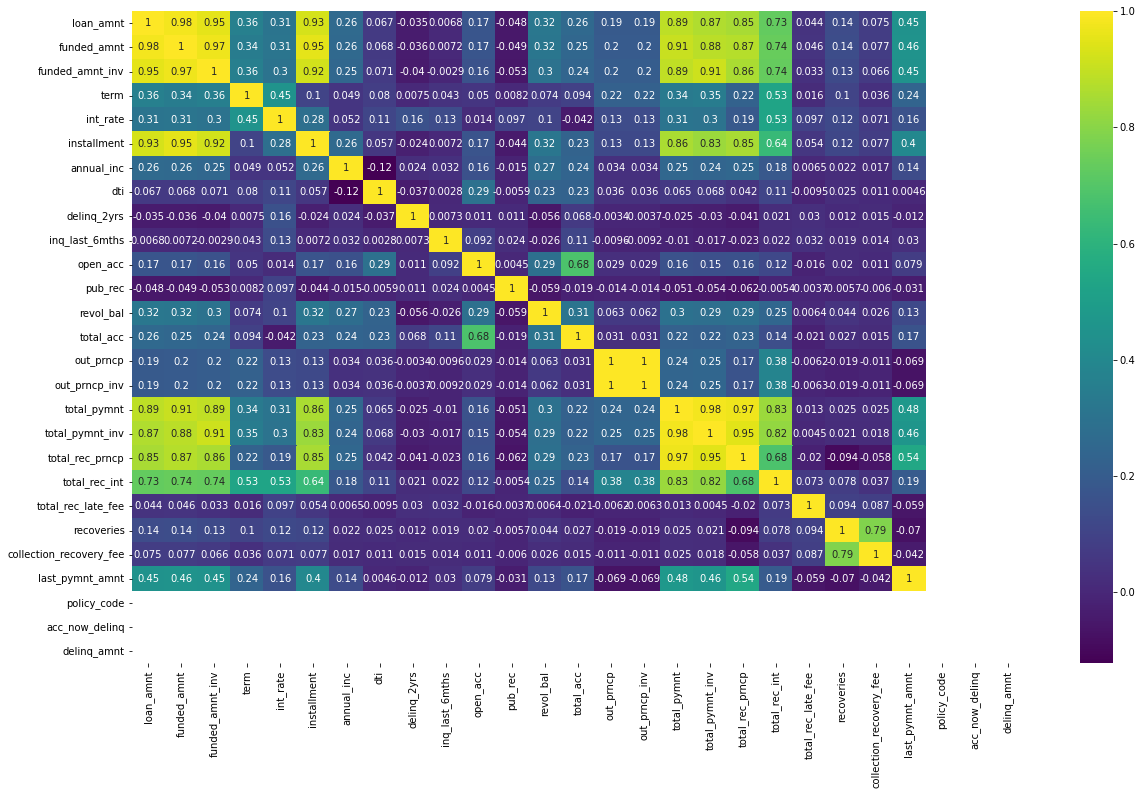

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df4[relevant_features].corr(), annot=True, cmap='viridis')
plt.show()

Notice the following relationship
- loan amount with installment amount
- loan amount with funded amount

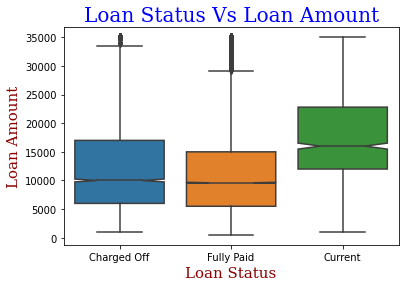

In [ ]:
sns.boxplot(data=df4, x=df4.loan_status , y=df4.loan_amnt, notch=True)

plt.title('Loan Status Vs Loan Amount',  fontdict = font1)
plt.xlabel("Loan Status", fontdict = font2)
plt.ylabel("Loan Amount", fontdict = font2)
plt.show()

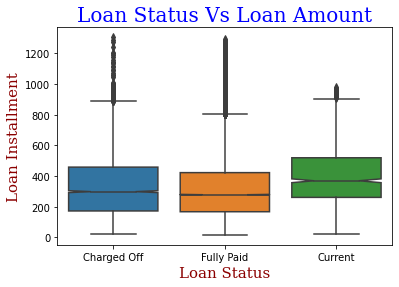

In [ ]:
sns.boxplot(data=df4, x=df4.loan_status , y=df4.installment, notch=True)
plt.title('Loan Status Vs Loan Amount',  fontdict = font1)
plt.xlabel("Loan Status", fontdict = font2)
plt.ylabel("Loan Installment", fontdict = font2)
plt.show()